In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading Dataset and Understanding Data


In [2]:
#Read the csv file using pandas
bikeSharing_df = pd.read_csv('day.csv')

In [3]:
#Inspect first few rows
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the shape
bikeSharing_df.shape

(730, 16)

In [5]:
#check dataframe for null and datatype 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#check the details of numeriacl data
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#check the columns of data
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#check the size of data
bikeSharing_df.size

11680

In [9]:
#check the datatypes of data
bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
#check the null values 
bikeSharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#check the unique values 
bikeSharing_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [12]:
#check the datatypes of data
bikeSharing_df.ndim

2

# **Cleaning Data**

**Drop columns that are not useful for analysis**



*   instant is just a row instance identifier.
*   dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.

*   casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.






In [13]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [14]:
#Inspect once
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [15]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [16]:
#Inspect data frame after dropping
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [17]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


3.2 Finding Outliers


*   Univarite outlier analysis by using Box plot




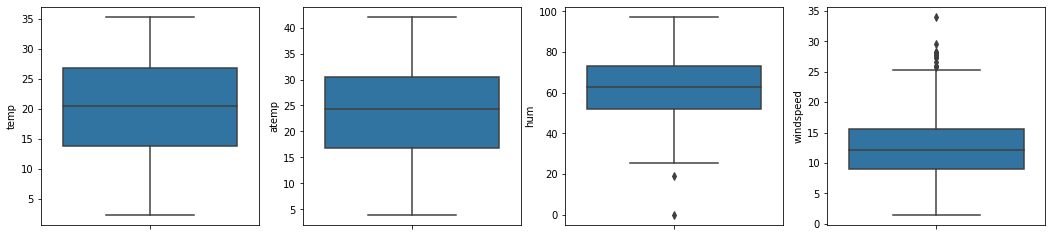

In [18]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

**Extract the outliers from hum and windspeed** 

In [19]:
def findOutliers(col):
  col_lq = bikeSharing_df[col].quantile(0.25)
  col_uq = bikeSharing_df[col].quantile(0.75)
  #extract the inter quartile range
  col_iqr = col_uq - col_lq
  #get the upper and lower bounds
  lower_bound = col_lq - 2*col_iqr
  upper_bound = col_uq + 2*col_iqr
  #extract values outside these bounds 
  col_outliers = bikeSharing_df[(bikeSharing_df[col] <= lower_bound) | (bikeSharing_df[col] >= upper_bound)]
  return col_outliers

In [20]:
hum_outliers=findOutliers('hum')
hum_outliers

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
68,1,0,3,0,4,1,3,15.952731,19.2834,0.0,17.545759,623,68


In [21]:
windspeed_outliers=findOutliers('windspeed')
windspeed_outliers

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
49,1,0,2,0,6,0,1,16.365847,19.5702,18.7917,34.000021,1635,49
431,1,1,3,0,4,1,1,21.627500,26.2302,56.7500,29.584721,5382,431


In [22]:
rows_toremove=[]
outliers=pd.concat([windspeed_outliers,hum_outliers])
print(outliers)


     season  yr  mnth  holiday  ...      hum  windspeed   cnt  days_old
49        1   0     2        0  ...  18.7917  34.000021  1635        49
431       1   1     3        0  ...  56.7500  29.584721  5382       431
68        1   0     3        0  ...   0.0000  17.545759   623        68

[3 rows x 13 columns]


In [23]:
for row in outliers.index:
   rows_toremove.append(row)

In [24]:
#removing the outliers data 
bikeSharing_df=bikeSharing_df.drop(rows_toremove,axis=0)

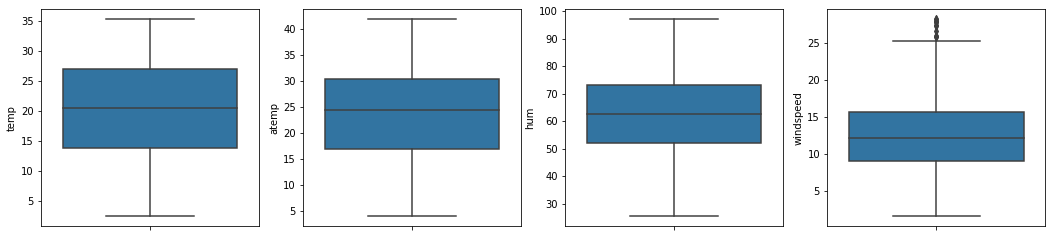

In [25]:
#boxplot after removing the outliers
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

**Visualing Numeric Variables**


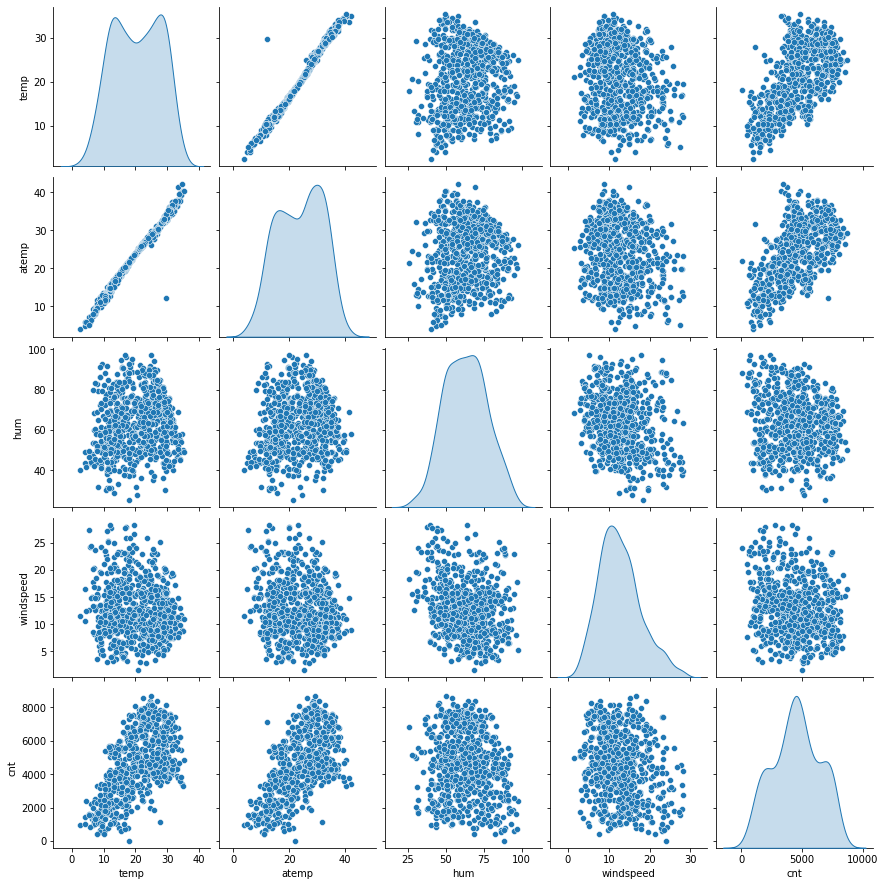

In [26]:
# Create a new dataframe of only numeric variables:
bikeSharing_num=bikeSharing_df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bikeSharing_num, diag_kind='kde')
plt.show()

**Insights**

*   The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'







**Visualising Categorical Variables**

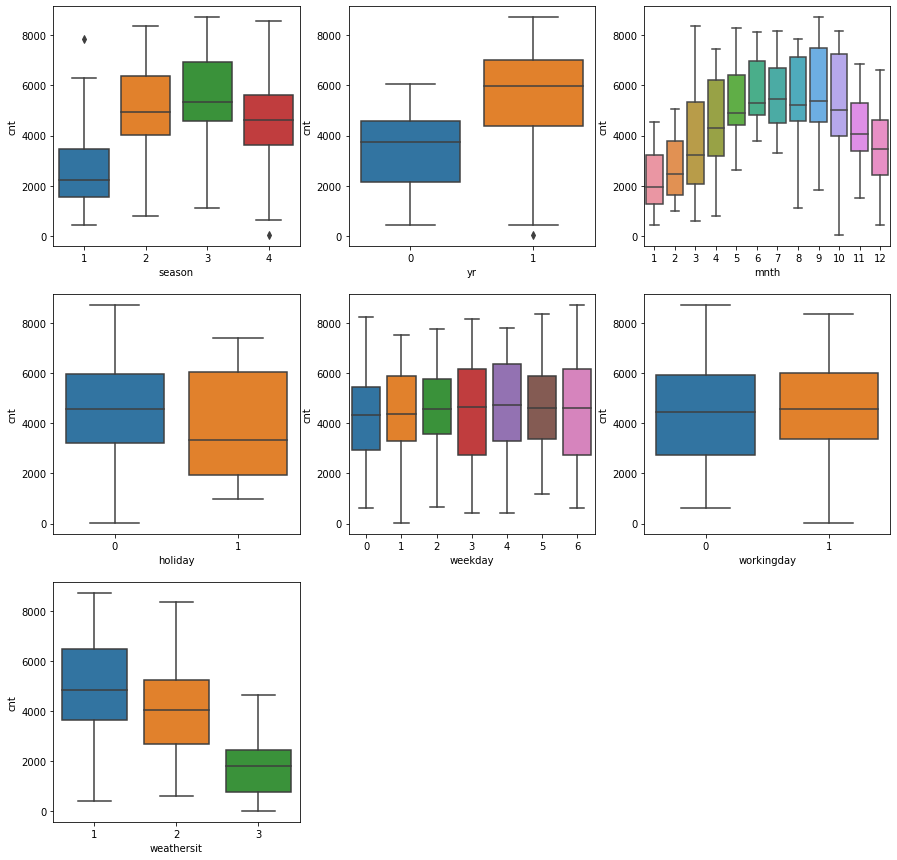

In [27]:
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

The following are the insights drawn from the above graphs

*   **Season**:season 3 has the highest number of bikes are rented out followed by the summer 
*  **month**:during september the bookings are higher and  then its starts droping from november.The count started increased from april to  september and then decresed due to the winter season 


*  **weathersit**:Most of the bikes rented during weathersit 1 followed by wethersit 2 and 3 which indicates when weather is gud  we can expect more bikes to get rented out
*   **holiday**:The bookings are higher during non holidays 
* **weekday**:weekday variable shows very close trend  having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

*   **workingday**:‘workingday’ with a median of close to 5000 booking (for the period of 2 years). Workinday median is higher than the holiday
*   






**Correlation Matrix**

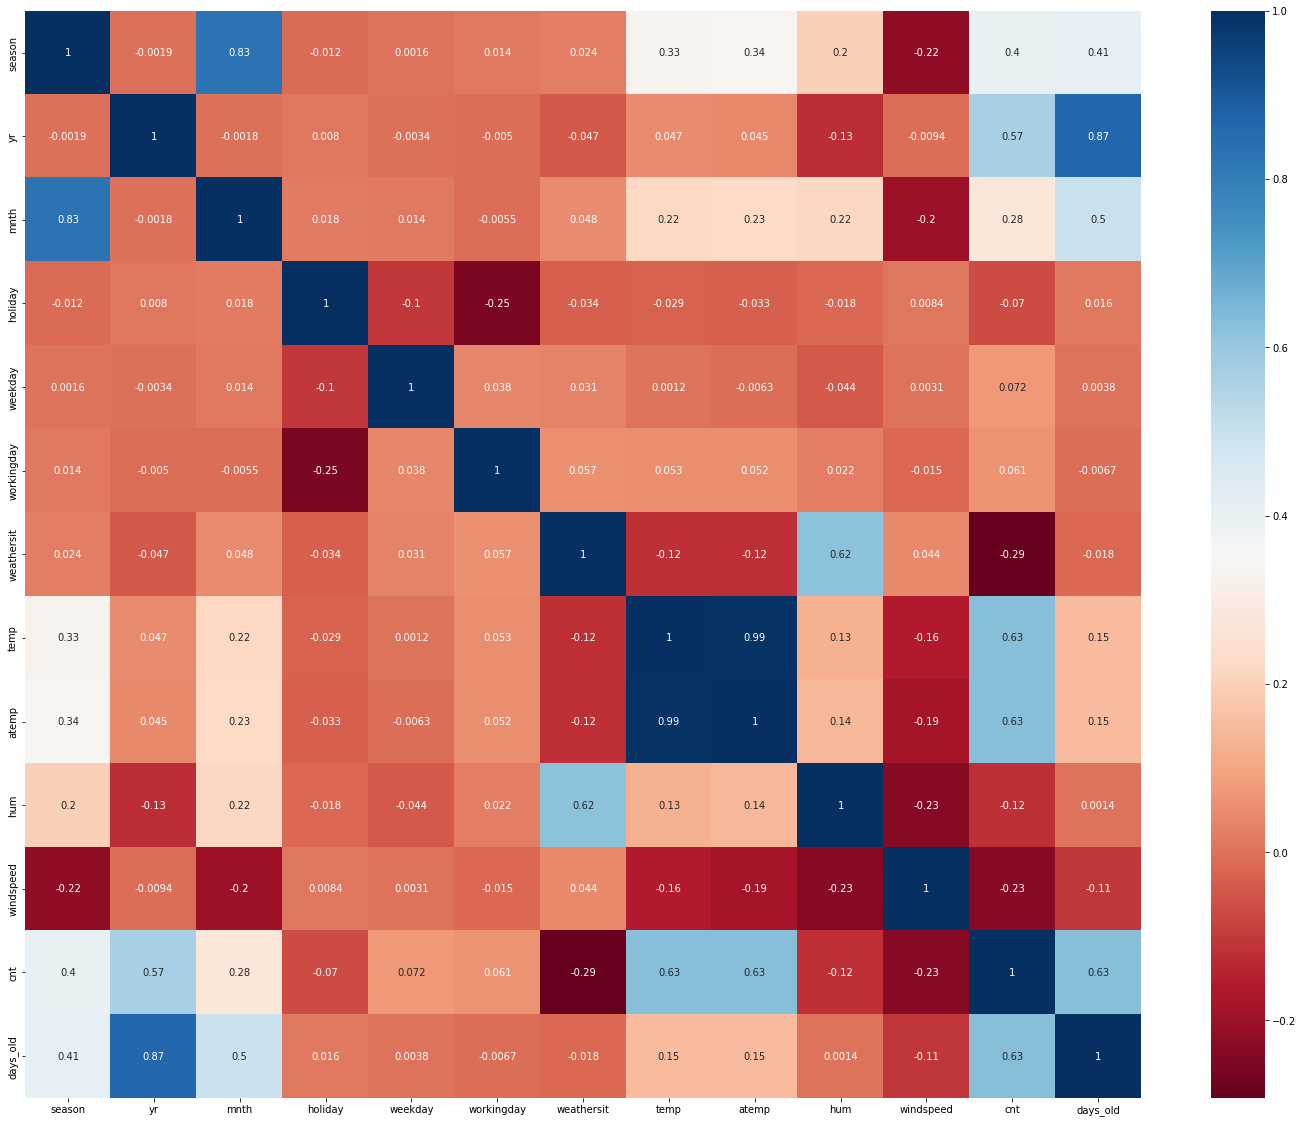

In [28]:
plt.figure(figsize = (25,20))
sns.heatmap(bikeSharing_df.corr(), annot = True, cmap="RdBu")
plt.show()

**Insights**:

*  The heatmap shows there is a multicollinearity between temp and atemp,year and days_old .
*   During features selection process in model construction  by using vif and p value these features can be removed or kept



# 4.RESCALING THE FEATURES

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [32]:
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [33]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bikeSharing_df[num_vars] = scaler.fit_transform(bikeSharing_df[num_vars])

In [34]:
# Checking values after scaling
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,0.355170,0.373517,0.767981,0.345236,0.110792,0
1,1,0,1,0,0,0,2,0.379232,0.360541,0.615202,0.565533,0.089623,1
2,1,0,1,0,1,1,1,0.171000,0.144830,0.254904,0.564958,0.152669,2
3,1,0,1,0,2,1,1,0.175530,0.174649,0.468123,0.344861,0.177174,3
4,1,0,1,0,3,1,1,0.209120,0.197158,0.254464,0.411391,0.181546,4


In [35]:
bikeSharing_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,2.504814,0.500688,6.541953,0.028886,2.990371,0.683631,1.393398,0.544145,0.519311,0.522092,0.418198,0.517039,365.250344
std,1.108279,0.500344,3.448254,0.167601,2.006509,0.465379,0.542274,0.228510,0.214313,0.194589,0.190546,0.222206,210.684763
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.345305,0.339238,0.371519,0.280718,0.364703,183.500000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.549345,0.536771,0.519721,0.396554,0.520824,365.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.743521,0.696732,0.662703,0.526892,0.685573,547.500000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,729.000000


# Encoding categorical data

In [36]:
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])



*   Dropping the first columns as (p-1) dummies can explain p categories.
*   In weathersit first column was not dropped so as to not lose the info about severe weather situation.



In [37]:
bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_2', 'season_3', 'season_4', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

# BUILDING A LINEAR MODEL

**Dividing the data into train and test for model building**

In [38]:
#y to contain only target variable
y=bikeSharing_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bikeSharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,0.355170,0.373517,0.767981,0.345236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0.379232,0.360541,0.615202,0.565533,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.254904,0.564958,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0.175530,0.174649,0.468123,0.344861,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0.209120,0.197158,0.254464,0.411391,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [40]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(508, 31)
(219, 31)


In [41]:
# Checking shape and size for train and test
print(y_train.shape)
print(y_test.shape)

(508,)
(219,)


**RFE**
**Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)** 

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [44]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lm, n_features_to_select=15,step=1)
rfe=rfe.fit(X_train,y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 17),
 ('season_2', False, 3),
 ('season_3', False, 4),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', False, 8),
 ('mnth_4', False, 14),
 ('mnth_5', False, 10),
 ('mnth_6', False, 16),
 ('mnth_7', False, 7),
 ('mnth_8', False, 15),
 ('mnth_9', False, 2),
 ('mnth_10', False, 5),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 9),
 ('weathersit_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_4',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

**Building Linear Model using 'STATS MODEL'**

In [48]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_4',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

**Model1** 

*   VIF check




In [49]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_vif(cols):
  vif = pd.DataFrame()
  X_train_rfe = X_train[cols]
  vif['Features'] = X_train_rfe.columns
  vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif

In [51]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

**Build Model1 with all features selected by RFE**

In [52]:
build_model(X_train_rfe.columns)
get_vif(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     139.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.36e-156
Time:                        07:59:51   Log-Likelihood:                 429.97
No. Observations:                 508   AIC:                            -831.9
Df Residuals:                     494   BIC:                            -772.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0554      0.025      2.253   

,Features,VIF
1,holiday,inf
2,workingday,inf
7,weekday_1,inf
8,weekday_2,inf
9,weekday_3,inf
10,weekday_4,inf
11,weekday_5,inf
12,weathersit_1,20.22
13,weathersit_2,15.67
14,weathersit_3,3.16


**Model2**

In [53]:
# removing weekday_4  because of its hig p value 
X_train_new = X_train_rfe.drop(["weekday_4"], axis = 1)
build_model(X_train_new.columns)
get_vif(X_train_new.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     139.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.36e-156
Time:                        07:59:51   Log-Likelihood:                 429.97
No. Observations:                 508   AIC:                            -831.9
Df Residuals:                     494   BIC:                            -772.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0554      0.025      2.253   

,Features,VIF
11,weathersit_1,20.22
12,weathersit_2,15.67
13,weathersit_3,3.16
2,workingday,2.43
4,hum,2.02
7,weekday_1,1.90
8,weekday_2,1.82
10,weekday_5,1.81
9,weekday_3,1.80
1,holiday,1.41


**Model3**


In [54]:
# removing weathersit_1  because of its high vif value 
X_train_new = X_train_new.drop(["weathersit_1"], axis = 1)
build_model(X_train_new.columns)
get_vif(X_train_new.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     139.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.36e-156
Time:                        07:59:51   Log-Likelihood:                 429.97
No. Observations:                 508   AIC:                            -831.9
Df Residuals:                     494   BIC:                            -772.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1632      0.026      6.169   

,Features,VIF
4,hum,10.98
2,workingday,7.24
3,temp,6.79
5,windspeed,3.90
11,weathersit_2,2.40
7,weekday_1,2.23
8,weekday_2,2.12
10,weekday_5,2.12
9,weekday_3,2.09
0,yr,1.97


**Model 4**

In [55]:
# removing hum  because of its high vif value 
X_train_new = X_train_new.drop(["hum"], axis = 1)
build_model(X_train_new.columns)
get_vif(X_train_new.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     146.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.62e-154
Time:                        07:59:52   Log-Likelihood:                 423.58
No. Observations:                 508   AIC:                            -821.2
Df Residuals:                     495   BIC:                            -766.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1083      0.022      4.990   

,Features,VIF
2,workingday,7.11
3,temp,4.06
4,windspeed,3.78
6,weekday_1,2.23
7,weekday_2,2.12
9,weekday_5,2.11
8,weekday_3,2.09
0,yr,1.97
10,weathersit_2,1.51
1,holiday,1.42


**Model 5**

In [56]:
# removing workingday  because of its high vif value 
X_train_new = X_train_new.drop(["workingday"], axis = 1)
build_model(X_train_new.columns)
get_vif(X_train_new.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     158.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.79e-154
Time:                        07:59:52   Log-Likelihood:                 421.21
No. Observations:                 508   AIC:                            -818.4
Df Residuals:                     496   BIC:                            -767.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1198      0.021      5.674   

,Features,VIF
2,temp,3.78
3,windspeed,3.68
0,yr,1.97
9,weathersit_2,1.50
5,weekday_1,1.45
6,weekday_2,1.34
8,weekday_5,1.33
7,weekday_3,1.32
4,season_4,1.28
1,holiday,1.13


**Model 6**

In [57]:
# removing weekday_2 because of its high p value 
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)
build_model(X_train_new.columns)
get_vif(X_train_new.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.14e-155
Time:                        07:59:52   Log-Likelihood:                 421.17
No. Observations:                 508   AIC:                            -820.3
Df Residuals:                     497   BIC:                            -773.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1190      0.021      5.695   

,Features,VIF
2,temp,3.68
3,windspeed,3.57
0,yr,1.97
8,weathersit_2,1.49
5,weekday_1,1.36
4,season_4,1.27
7,weekday_5,1.26
6,weekday_3,1.24
1,holiday,1.13
9,weathersit_3,1.11


**Model7**

In [58]:
# removing weekday_3  because of its high vif value 
X_train_new = X_train_new.drop(["weekday_3"], axis = 1)
build_model(X_train_new.columns)
get_vif(X_train_new.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     193.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.65e-156
Time:                        07:59:52   Log-Likelihood:                 421.07
No. Observations:                 508   AIC:                            -822.1
Df Residuals:                     498   BIC:                            -779.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1204      0.021      5.821   

,Features,VIF
2,temp,3.54
3,windspeed,3.54
0,yr,1.97
7,weathersit_2,1.49
5,weekday_1,1.32
4,season_4,1.27
6,weekday_5,1.21
1,holiday,1.13
8,weathersit_3,1.09


**Model8**

In [59]:
# removing weekday_3  because of its high vif value 
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)
build_model(X_train_new.columns)
get_vif(X_train_new.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     218.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.34e-157
Time:                        07:59:52   Log-Likelihood:                 420.85
No. Observations:                 508   AIC:                            -823.7
Df Residuals:                     499   BIC:                            -785.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1195      0.021      5.794   

,Features,VIF
3,windspeed,3.52
2,temp,3.49
0,yr,1.96
6,weathersit_2,1.49
4,season_4,1.27
5,weekday_5,1.18
7,weathersit_3,1.09
1,holiday,1.04


**Model 9**

In [60]:
# removing weekday_5  because of its high vif value 
X_train_new = X_train_new.drop(["weekday_5"], axis = 1)
build_model(X_train_new.columns)
get_vif(X_train_new.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     248.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.83e-158
Time:                        07:59:52   Log-Likelihood:                 420.03
No. Observations:                 508   AIC:                            -824.1
Df Residuals:                     500   BIC:                            -790.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1213      0.021      5.894   

,Features,VIF
3,windspeed,3.49
2,temp,3.44
0,yr,1.96
5,weathersit_2,1.49
4,season_4,1.27
6,weathersit_3,1.09
1,holiday,1.04


**Model 10**

In [61]:
#from the above parameters if we check seasons as it has 4 values and encoded to  categorical data ,so checking the adjustedr2,p,vif values by including one more season
X_train_new['season_2']=X_train['season_2']


In [62]:
build_model(X_train_new.columns)
get_vif(X_train_new.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     245.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.03e-167
Time:                        07:59:52   Log-Likelihood:                 443.94
No. Observations:                 508   AIC:                            -869.9
Df Residuals:                     499   BIC:                            -831.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1177      0.020      5.986   

,Features,VIF
2,temp,3.65
3,windspeed,3.62
0,yr,1.96
7,season_2,1.59
5,weathersit_2,1.49
4,season_4,1.39
6,weathersit_3,1.09
1,holiday,1.04


**Model 11**

*   Adding month column sept to check the r2,pvalue and vif as the sept has the highest cnt 



In [63]:
X_train_new['mnth_9']=X_train['season_2']

In [64]:
build_model(X_train_new.columns)
get_vif(X_train_new.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     242.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.30e-175
Time:                        07:59:52   Log-Likelihood:                 466.10
No. Observations:                 508   AIC:                            -912.2
Df Residuals:                     498   BIC:                            -869.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1233      0.019      6.536   

,Features,VIF
2,temp,4.01
3,windspeed,3.64
0,yr,1.96
7,season_2,1.68
5,weathersit_2,1.50
4,season_4,1.40
8,mnth_9,1.23
6,weathersit_3,1.09
1,holiday,1.04


This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

In [65]:
lr_finalmodel=build_model(X_train_new.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     242.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.30e-175
Time:                        07:59:52   Log-Likelihood:                 466.10
No. Observations:                 508   AIC:                            -912.2
Df Residuals:                     498   BIC:                            -869.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1233      0.019      6.536   

In [66]:
print(lr_finalmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     242.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.30e-175
Time:                        07:59:52   Log-Likelihood:                 466.10
No. Observations:                 508   AIC:                            -912.2
Df Residuals:                     498   BIC:                            -869.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1233      0.019      6.536   

# Final Model Interpretation

**Hypothesis Testing:**

  Hypothesis testing states that:

*   H0:B1=B2=...=Bn=0
*   H1: at least one Bi!=0

**lr_finalmodel coefficient values**
  

*   const            0.1233    
*   yr               0.2297 
*   holiday         -0.1153   
*   temp             0.5373 
*   windspeed       -0.0981 
*   season_4         0.1400  
*   weathersit_2    -0.0922 
*   weathersit_3    -0.2788 
*   season_2         0.0952  
*   mnth_9           0.1075   








**Insights:**

*   From the lm_finalmodel summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS




**F Statistics**

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is
*   F-statistic: 242.2
*   Prob (F-statistic): 1.30e-175
The F-Statistics value of 242.2 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant



**The equation of best fitted surface based on model :**

cnt = 0.1233 + (yr × 0.2297) -(holiday ×0.1153)+ (temp × 0.5373) − (windspeed × 0.0981) + (season2 × 0.0952) + (season4 ×0.1400) + (mnth9 × 0.1075) − (weathersit2 × 0.0922) − (weathersit3 × 0.2788)

**Interpretation of Coefficients:**

*   **temp**: A coefficient value of ‘0.5373’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5373 units
*   **weathersit_3**: A coefficient value of ‘-0.2788’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.2788 units.


*   **yr**: A coefficient value of ‘0.2297’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2297 units.
* **season_4**: A coefficient value of ‘0.1400’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1400 units.


*   **windspeed**: A coefficient value of ‘-0.0981’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by0.0981 units.
*   **holidayday**: A coefficient value of ‘-0.1153’ indicated that, a unit increase in holiday variable decreases the bike hire numbers by 0.1153 units.


*  **season_2**: A coefficient value of ‘0.0952’ indicated that w.r.t season_1, a unit increase in season_2 variable increases the bike hire numbers by 0.0952 units.

* **mnth_9**: A coefficient value of ‘0.1075  ’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.1075   units.

* **const**: The Constant value of ‘0.1233 ’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.1233  units.

*  **weathersit_2**: A coefficient value of ‘-0.2788’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.074807 units.











# Assumptions

**Error terms are normally distributed with mean zero (not X, Y)**

*   Residual Analysis Of Training Data



In [67]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_4', 'weathersit_2',
       'weathersit_3', 'season_2', 'mnth_9'],
      dtype='object')

In [68]:
X_train_new.shape

(508, 9)

In [69]:
X_train_sm = sm.add_constant(X_train_new)
y_train_pred=lr_finalmodel.predict(X_train_sm)

Text(0.5, 0, 'Errors')

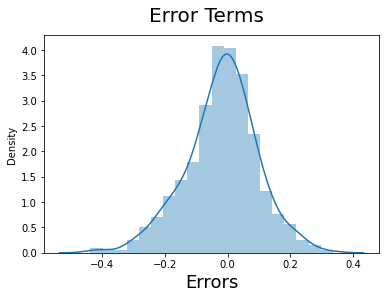

In [70]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

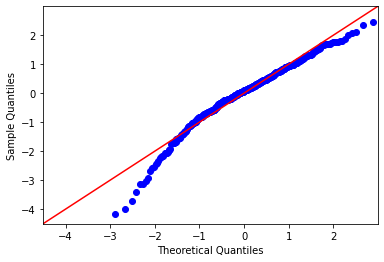

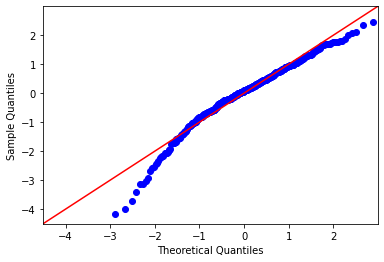

In [82]:
import statsmodels.api as sm
from scipy import stats
sm.graphics.qqplot(lr_finalmodel.resid, dist=stats.norm, line='45', fit=True)

**Insights**


*   From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.




**There is No Multicollinearity between the predictor variables**

In [71]:
get_vif(X_train_new.columns)

,Features,VIF
2,temp,4.01
3,windspeed,3.64
0,yr,1.96
7,season_2,1.68
5,weathersit_2,1.50
4,season_4,1.40
8,mnth_9,1.23
6,weathersit_3,1.09
1,holiday,1.04


# MAKING PREDICTION USING FINAL MODEL

In [72]:
X_test=X_test[X_train_new.columns]
X_test.head()

,yr,holiday,temp,windspeed,season_4,weathersit_2,weathersit_3,season_2,mnth_9
516,1,0,0.741445,0.538085,0,1,0,1,0
696,1,0,0.295982,0.471211,1,0,0,0,0
379,1,0,0.133996,0.572333,0,0,0,0,0
33,0,0,0.159278,0.638587,0,0,0,0,0
64,0,0,0.395486,0.802472,0,1,0,0,0


In [73]:
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 516 to 584
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_4      219 non-null    uint8  
 6   weathersit_2  219 non-null    uint8  
 7   weathersit_3  219 non-null    uint8  
 8   season_2      219 non-null    uint8  
 9   mnth_9        219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [74]:
y_pred = lr_finalmodel.predict(X_test_lm6)

# MODEL EVALUATION

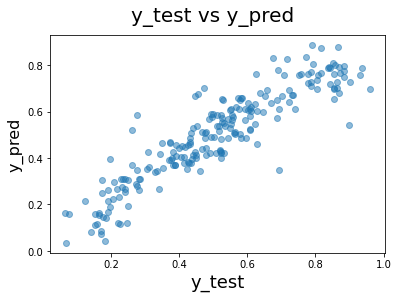

In [75]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

**R^2 Value for TEST**

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8247984044581571

**Adjusted R^2 Value for TEST**

In [77]:
# n is number of rows in X
r2=r2_score(y_test, y_pred)
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8172538381429582

# Final Result Comparison



*   Train R^2 :0.814
*   Train Adjusted R^2 :0.811

*   Test R^2 :0.824
*   Test Adjusted R^2 :0.817

*   This seems to be a really good model that can very well 'Generalize' various datasets.







# FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are:



*   **Temparature(temp)**:A coefficient value of ‘0.5373’ indicated that a unit increase in temp variable increases the bike hire numbers by '0.5373' units
*  **Weather situation 3(weathersit3)**:A coefficient value of ‘-0.2788’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2788 units.
*   **year(yr)**:A coefficient value of ‘0.2297’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units
 



